In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Any results you write to the current directory are saved as output.
train_data = pd.read_csv("kaggle/input/train.csv")
test_data = pd.read_csv("kaggle/input/test.csv")

print("Data:")
print(test_data.head())
print("")
print("Summary TestData:")
print(test_data.describe())
print("")
print("Summary TrainData:")
print(train_data.describe())

Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Summary TestData:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.0

# Data Quality

In [3]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
test_data[test_data['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [2]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Sex

In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


# Age

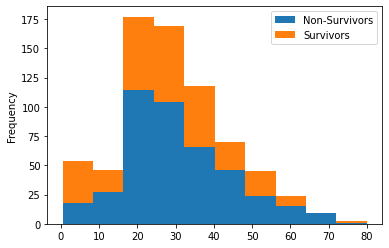

In [6]:
pd.DataFrame({'Non-Survivors': train_data.groupby('Survived').get_group(0).Age,
              'Survivors':   train_data.groupby('Survived').get_group(1).Age}).plot.hist(stacked=True)

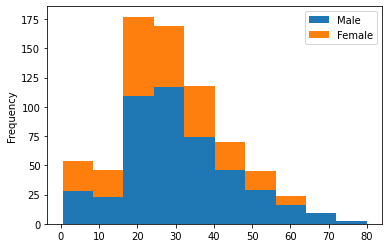

In [8]:
pd.DataFrame({'Male': train_data.groupby('Sex').get_group('male').Age,
              'Female':   train_data.groupby('Sex').get_group('female').Age}).plot.hist(stacked=True)

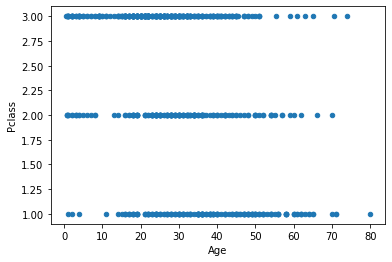

In [33]:
train_data.plot.scatter(
    x="Age",
    y="Pclass"
)

In [30]:
print("Mean Age of Pclass 1 / male: " + str(train_data[(train_data["Pclass"] == 1) & (train_data["Sex"] == "male")].Age.mean()))
print("Mean Age of Pclass 1 / female: " + str(train_data[(train_data["Pclass"] == 1) & (train_data["Sex"] == "female")].Age.mean()))
print("Mean Age of Pclass 2 / male: " + str(train_data[(train_data["Pclass"] == 2) & (train_data["Sex"] == "male")].Age.mean()))
print("Mean Age of Pclass 2 / female: " + str(train_data[(train_data["Pclass"] == 2) & (train_data["Sex"] == "female")].Age.mean()))
print("Mean Age of Pclass 3 / male: " + str(train_data[(train_data["Pclass"] == 3) & (train_data["Sex"] == "male")].Age.mean()))
print("Mean Age of Pclass 3 / female: " + str(train_data[(train_data["Pclass"] == 3) & (train_data["Sex"] == "female")].Age.mean()))

Mean Age of Pclass 1 / male: 41.28138613861386
Mean Age of Pclass 1 / female: 34.61176470588235
Mean Age of Pclass 2 / male: 30.74070707070707
Mean Age of Pclass 2 / female: 28.722972972972972
Mean Age of Pclass 3 / male: 26.507588932806325
Mean Age of Pclass 3 / female: 21.75


In [41]:
print("Median Age of Pclass 1 / male: " + str(train_data[(train_data["Pclass"] == 1) & (train_data["Sex"] == "male")].Age.median()))
print("Median Age of Pclass 1 / female: " + str(train_data[(train_data["Pclass"] == 1) & (train_data["Sex"] == "female")].Age.median()))
print("Median Age of Pclass 2 / male: " + str(train_data[(train_data["Pclass"] == 2) & (train_data["Sex"] == "male")].Age.median()))
print("Median Age of Pclass 2 / female: " + str(train_data[(train_data["Pclass"] == 2) & (train_data["Sex"] == "female")].Age.median()))
print("Median Age of Pclass 3 / male: " + str(train_data[(train_data["Pclass"] == 3) & (train_data["Sex"] == "male")].Age.median()))
print("Median Age of Pclass 3 / female: " + str(train_data[(train_data["Pclass"] == 3) & (train_data["Sex"] == "female")].Age.median()))

Median Age of Pclass 1 / male: 40.0
Median Age of Pclass 1 / female: 35.0
Median Age of Pclass 2 / male: 30.0
Median Age of Pclass 2 / female: 28.0
Median Age of Pclass 3 / male: 25.0
Median Age of Pclass 3 / female: 21.5


# Fare

In [4]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

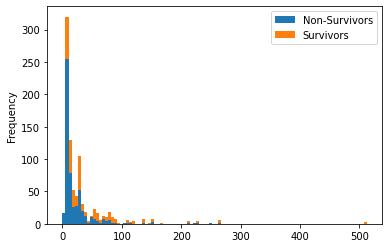

In [8]:
pd.DataFrame({'Non-Survivors': train_data.groupby('Survived').get_group(0).Fare,
              'Survivors':   train_data.groupby('Survived').get_group(1).Fare}).plot.hist(stacked=True, bins=100)


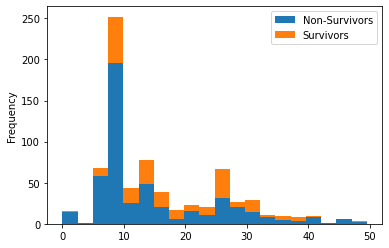

In [3]:
train_data_fare_below_100 = train_data[train_data["Fare"] < 50]
pd.DataFrame({'Non-Survivors': train_data_fare_below_100.groupby('Survived').get_group(0).Fare,
              'Survivors':   train_data_fare_below_100.groupby('Survived').get_group(1).Fare}).plot.hist(stacked=True, bins = 20)


# Cabin

In [33]:
train_data_cabin = train_data
train_data_cabin.Cabin = train_data.Cabin.str[0]
train_data_cabin.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
train_data_cabin_group = train_data_cabin.groupby(['Cabin', 'Pclass'])['Survived'].agg(['count', 'sum'])
train_data_cabin_group

count  sum
Cabin Pclass            
A     1          15    7
B     1          47   35
C     1          59   35
D     1          29   22
      2           4    3
E     1          25   18
      2           4    3
      3           3    3
F     2           8    7
      3           5    1
G     3           4    2
T     1           1    0